# **Palmer Penguins**     
This notebook contains analysis of the Palmer Penguins dataset. 

## Setting up the Data

***

#### Importing Pandas   
- Pandas is a Python Library used for cleaning, analyzing and manipulating data.   
- Common practice is for it to be abbreviated to *pd* when importing it.

In [1]:
# Import Pandas   
import pandas as pd 

#### Loading the Data   
- The Palmer Penguins dataset, which is a csv file, is loaded using Pandas *read_csv* functionality.   
- The variable *peng* is assigned for ease of use when writing Python code.

In [2]:
# Load the penguins dataset
peng = pd.read_csv('penguins.csv')

#### Checking the Data has loaded   
- Running the variable *peng* will return a view of all the columns as well as some of the values.
- It will also summarise the amount of rows and columns

In [3]:
#Check that the data has loaded
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Analyzing the Data   

***

### **1. Initial Basic Analysis**

##### ***First of all, let's see if there is any missing data:***

In [4]:
# Check if there is any missing data from the dataset
peng.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

##### As can be seen from the above, there is very little missing data; 2 values are missing from four of the Columns, and 11 values are missing from the sex column.

##### ***Next, let's look at some basic analysis of the data:***

##### ***How many penguins of each species are there?***

In [5]:
# Count number of each species
peng['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

##### ***How many penguins of each sex are there?***

In [6]:
# Count number of each sex (this won't add up to the full amount as 11 values are missing)
peng['sex'].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

##### ***What is the breakdown of sex in each species?***

In [7]:
# Number of males and females per species
peng.groupby('species').sex.value_counts()

species    sex   
Adelie     female    73
           male      73
Chinstrap  female    34
           male      34
Gentoo     male      61
           female    58
Name: count, dtype: int64

##### ***How many penguins are on each island?***

In [8]:
# Number of penguins on each island
peng['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

##### ***What species of penguin are on each island?***

In [9]:
# Penguin species per island
peng.groupby('island').species.value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

##### ***What is the average size(body mass), bill length, bill depth and flipper length per species?***

In [10]:
# Averages per species
peng.groupby('species')[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].mean().sort_values(['body_mass_g'], ascending=False)

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
species,,,,
Gentoo,5076.016260,47.504878,14.982114,217.186992
Chinstrap,3733.088235,48.833824,18.420588,195.823529
Adelie,3700.662252,38.791391,18.346358,189.953642


##### ***What is the average size(body mass), bill length, bill depth and flipper length per sex?***

In [11]:
# Averages per sex
peng.groupby('sex')[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].mean().sort_values(['body_mass_g'], ascending=False)

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
sex,,,,
male,4545.684524,45.854762,17.891071,204.505952
female,3862.272727,42.096970,16.425455,197.363636


##### ***What is the average size(body mass), bill length, bill depth and flipper length per species and per sex?***

In [12]:
# Averages per species and sex
peng.groupby(['species', 'sex'])[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].mean().sort_values('species')

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female  3368.835616       37.257534      17.621918   
          male    4043.493151       40.390411      19.072603   
Chinstrap female  3527.205882       46.573529      17.588235   
          male    3938.970588       51.094118      19.252941   
Gentoo    female  4679.741379       45.563793      14.237931   
          male    5484.836066       49.473770      15.718033   

                  flipper_length_mm  
species   sex                        
Adelie    female         187.794521  
          male           192.410959  
Chinstrap female         191.735294  
          male           199.911765  
Gentoo    female         212.706897  
          male           221.540984

In [21]:
peng.groupby(['species', 'sex'])[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].std().sort_values('species')

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female   269.380102        2.028883       0.942993   
          male     346.811553        2.277131       1.018886   
Chinstrap female   285.333912        3.108669       0.781128   
          male     362.137550        1.564558       0.761273   
Gentoo    female   281.578294        2.051247       0.540249   
          male     313.158596        2.720594       0.741060   

                  flipper_length_mm  
species   sex                        
Adelie    female           5.595035  
          male             6.599317  
Chinstrap female           5.754096  
          male             5.976558  
Gentoo    female           3.897856  
          male             5.673252

##### ***Graph illustrating body mass average per sex per species.***

<Axes: xlabel='species,sex'>

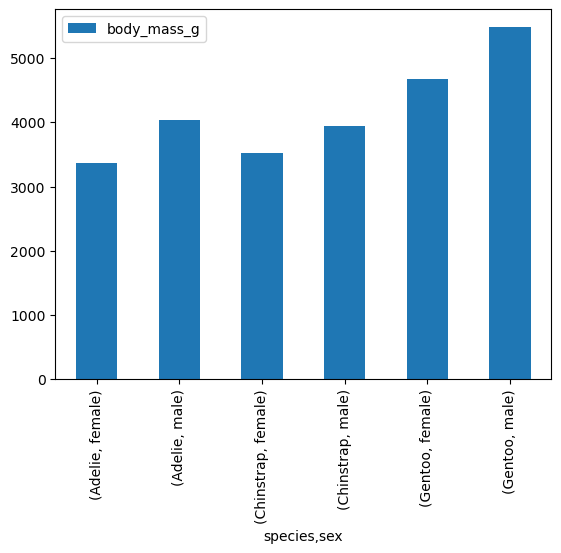

In [15]:
# Graph body mass average per sex per species
peng.groupby(['species', 'sex'])[['body_mass_g']].mean().sort_values('species').plot(kind='bar')

In [22]:
peng.groupby(['species', 'sex'])[['body_mass_g']].std().sort_values('species')

body_mass_g
species   sex                
Adelie    female   269.380102
          male     346.811553
Chinstrap female   285.333912
          male     362.137550
Gentoo    female   281.578294
          male     313.158596

In [23]:
peng['body_mass_g'].sort_values()

314    2700.0
64     2850.0
58     2850.0
116    2900.0
98     2900.0
        ...  
269    6000.0
185    6050.0
169    6300.0
3         NaN
271       NaN
Name: body_mass_g, Length: 344, dtype: float64

##### ***Graph illustrating the average bill length per sex per species.***

<Axes: xlabel='species,sex'>

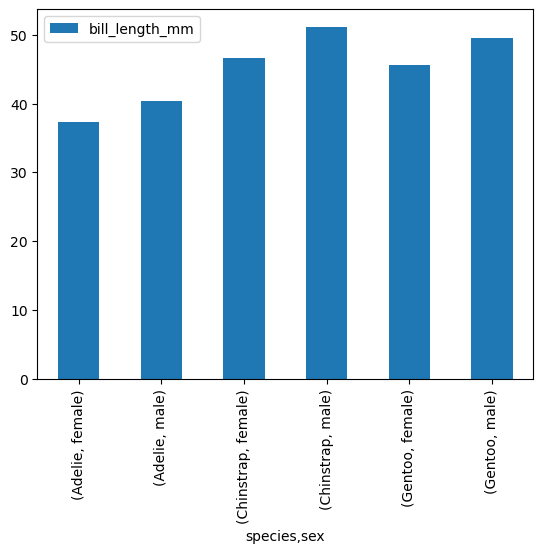

In [18]:
# Graph bill length average per sex per species
peng.groupby(['species', 'sex'])[['bill_length_mm']].mean().sort_values('species').plot(kind='bar')

##### ***Graph illustrating the average bill depth per sex per species.***

<Axes: xlabel='species,sex'>

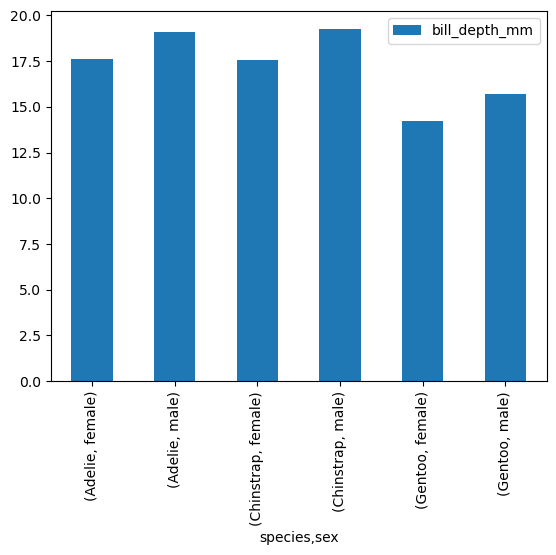

In [19]:
# Graph bill depth average per sex per species
peng.groupby(['species', 'sex'])[['bill_depth_mm']].mean().sort_values('species').plot(kind='bar')

##### ***Graph illustrating the average flipper length per species per sex.***

<Axes: xlabel='species,sex'>

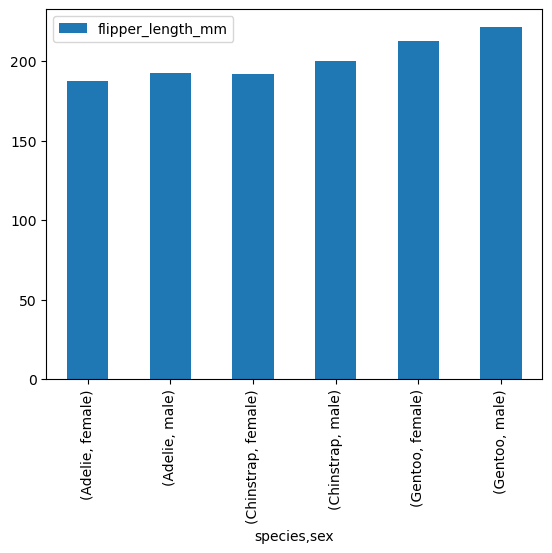

In [20]:
# Graph average flipper length per sex per species
peng.groupby(['species', 'sex'])[['flipper_length_mm']].mean().sort_values('species').plot(kind='bar')

### **Summary**

In [14]:
# Describe the dataset
peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


***
### End